# points layer tutorial

Welcome to the tutorial on the **napari** `Points` layer!

This tutorial assumes you have already installed **napari**, know how to launch
the viewer, and are familiar with its layout. For help with installation see our
[installation](./installation) tutorial. For help getting started with the
viewer see our [getting started](./getting_started) tutorial. For help
understanding the organisation of the viewer, including things like the layers
list, the layer properties widgets, the layer control panels, and the dimension
sliders see our [napari viewer](./viewer) tutorial.

This tutorial will teach you about the **napari** `Points` layer, including
displays spots over an image that have been found in an automated fashion, or
manually annotating an image with points. At the end of the tutorial you should
understand how to add a points layer and edit it from the GUI and from the
console.

The points layer allows you to display an NxD array of N points in D
coordinates. You can adjust the size, face color, and edge color of all the
points independently. You can also adjust the opactiy, edge width, and symbol
representing all the points simultaneously.

Each data point can have annotations associated with it using the
`Points.properties` dictionary. These properties can be used to set the face and
edge colors of the points. For example, when displaying points of different
classes/types, one could automatically set color the individual points by their
respective class/type. For more details on point properties, see the "setting
point edge and face color with properties" below or the [point annotation
tutorial](../applications/annotate_points).

## a simple example

You can create a new viewer and add a set of points in one go using the
`napari.view_points` method, or if you already have an existing viewer, you can
add points to it using `viewer.add_points`. The api of both methods is the same.
In these examples we'll mainly use `add_points` to overlay points onto on an
existing image.

In this example of we will overlay some points on the image of an astronaut:

In [1]:
import napari
import numpy as np
from skimage import data

viewer = napari.view_image(data.astronaut(), rgb=True)
points = np.array([[100, 100], [200, 200], [300, 100]])

points_layer = viewer.add_points(points, size=30)

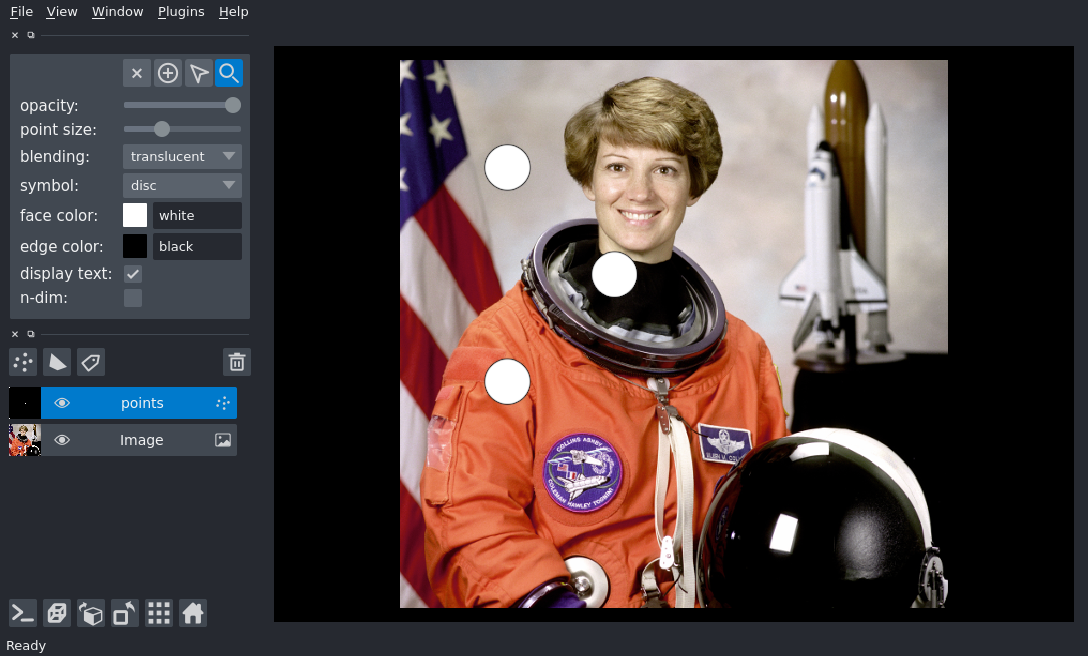

In [2]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [3]:
viewer.close()

## arguments of view_points and add_points

{meth}`~napari.view_layers.view_points` and {meth}`~napari.Viewer.add_points`
accept the same layer-creation parameters.

In [4]:
help(napari.view_points)

Help on function view_points:

view_points(data=None, *, ndim=None, properties=None, text=None, symbol='o', size=10, edge_width=1, edge_color='black', edge_color_cycle=None, edge_colormap='viridis', edge_contrast_limits=None, face_color='white', face_color_cycle=None, face_colormap='viridis', face_contrast_limits=None, n_dimensional=False, name=None, metadata=None, scale=None, translate=None, rotate=None, shear=None, affine=None, opacity=1, blending='translucent', visible=True, title='napari', ndisplay=2, order=(), axis_labels=(), show=True)
    Create a viewer and add a points layer.
    
    Parameters
    ----------
    data : array (N, D)
        Coordinates for N points in D dimensions.
    ndim : int
        Number of dimensions for shapes. When data is not None, ndim must be D.
        An empty points layer can be instantiated with arbitrary ndim.
    properties : dict {str: array (N,)}, DataFrame
        Properties for each point. Each property should be an array of length N,
 

## points data

The input data to the points layer must be an NxD numpy array containing the
coordinates of N points in D dimensions. The ordering of these dimensions is the
same as the ordering of the dimensions for image layers. This array is always
accessible through the `layer.data` property and will grow or shrink as new
points are either added or deleted.

## using the points properties dictionary

The `Points` layer can contain properties that annotate each point.
`Points.properties` stores the properties in a dictionary where each key is the
name of the property and the values are numpy arrays with a value for each point
(i.e., length N for N points in `Points.data`). As we will see below, we can use
the values in a property to set the display properties of the points (e.g., face
color or edge color). To see the points properties in action, please see the
[point annotation tutorial](../applications/annotate_points).

## creating a new points layer

As you can add new points to a points layer using the add points tool, it is
possible to create a brand new empty points layers by clicking the new points
layer button above the layers list. The shape of the points layer is defined by
the points inside it, and so as you add new points the shape will adjust as
needed. The dimension of the new points layer will default to the largest
dimension of any layer currently in the viewer, or to 2 if no other layers are
present in the viewer.

## non-editable mode

If you want to disable editing of the points layer you can set the `editable`
property of the layer to `False`.

As note in the section on 3D rendering, when using 3D rendering the points layer
is not editable.

## 3D rendering of points

All our layers can be rendered in both 2D and 3D mode, and one of our viewer
buttons can toggle between each mode. The number of dimensions sliders will be 2
or 3 less than the total number of dimensions of the layer. See for example
these points overlaid on an image in both 2D and 3D:

![image: smFISH with points overlaid](../assets/tutorials/smFISH.gif)

Note though that when entering 3D rendering mode the point add, delete, and
select tools are all disabled. Those options are only supported when viewing a
layer using 2D rendering.

## pan and zoom mode

The default mode of the points layer is to support panning and zooming, as in
the image layer. This mode is represented by the magnifying glass in the layers
control panel, and while it is selected editing the layer is not possible.
Continue reading to learn how to use some of the editing modes. You can always
return to pan and zoom mode by pressing the `Z` key when the points layer is
selected.

## adding, deleting, and selecting points

New points can be added using the point adding tool. This tool can be selected
from layer controls panel. Points can then be added by clicking in the canvas.
If you have a multidimensional points layer then the coordinates of the new
point will keep track of the currently viewed slice that you added the point
too. You can quickly select the add points tool by pressing the `P` key when the
points layer is selected. The point adding tool also supports panning and
zooming.

You can select a point by selecting the select points tool and then clicking on
that point. You can select multiple points by continuing to shift click on
additional points, or by dragging a bounding box around the points you want to
select. You can quickly select the select points tool by pressing the `S` key
when the points layer is selected.

You can select all the points in the currently viewed slice by clicking the `A`
key if you are in select mode.

Once selected you can delete the selected points by clicking on the delete
button in the layer controls panel or pressing the delete key.

When using the point selection tool the pan and zoom functionality of the viewer
canvas is disabled and you are able to select points the layer. You can
temporarily re-enable pan and zoom by pressing and holding the spacebar. This
feature can be useful if you want to move around the points layer as you create
your selection.

## changing points size

Each point can have a different size. You can pass a list or 1-dimensional array
of points through the size keyword argument to initialize the layer with points
of different sizes. These sizes are then accessible through the `sizes`
property. If you pass a single size then all points will get initialized with
that size. Points can be pseduo-visualized as n-dimensionsal if the
`n-dimensional` property is set to `True` or the `n-dimensional` checkbox is
checked. In this setting when viewing different slices of the layer points will
appear in the neighbouring slices to the ones in which they are located with a
size scaled by the distance from their center to that slice. This feature can be
especially useful when visualizing 2D slices of points that are located in a 3D
volume.

Points can also be resized within the GUI by first selecting them and then
adjusting the point size slider. If no points are selected, then adjusting the
slider value will only serve to initialize the size for new points that are
about to be added. The value of the size of the next point to be added can be
found in the `layer.size` property. Note this property is different from
`layer.sizes` which contains the current sizes of all the points.

## changing points edge and face color

Individual points can each have different edge and face colors. You can
initially set these colors by providing a list of colors to the `edge_color` or
`face_color` keyword arguments respectively, or you can edit them from the GUI.
The colors of each of the points are available as lists under the
`layer.edge_colors` and `layer.face_colors` properties. Similar to the `sizes`
and `size` properties these properties are different from the `layer.edge_color`
and `layer.face_color` properties that will determine the color of the next
point to be added or any currently selected points.

To change the point color properties from the GUI you must first select the
points whose properties you want to change, otherwise you will just be
initializing the property for the next point you add.

## setting point edge and face color with properties

Point edge and face colors can be set as a function of a property in
`Points.properties`. There are two ways that the values in properties can be
mapped to colors: (1) color cycles and (2) colormaps.

Color cycles are sets of colors that are mapped to categorical properties. The
colors are repeated if the number of unique property values is greater than the
number of colors in the color cycle.

Colormaps are a continuum of colors that are mapped to a continuous property
value. The available colormaps are listed below (colormaps are from
[vispy](http://vispy.org/color.html#vispy.color.Colormap)). For some guidance on
choosing colormaps, see the [matplotlib colormap
docs](https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html).

In [5]:
list(napari.utils.colormaps.AVAILABLE_COLORMAPS)

['PiYG',
 'blue',
 'bop blue',
 'bop orange',
 'bop purple',
 'cyan',
 'gist_earth',
 'gray',
 'gray_r',
 'green',
 'hsv',
 'inferno',
 'magenta',
 'magma',
 'plasma',
 'red',
 'turbo',
 'twilight',
 'twilight_shifted',
 'viridis',
 'yellow']

### setting edge or face color with a color cycle

Here we will set the edge color of the markers with a color cycle on a property.
To do the same for a face color, substitute `face_color` for `edge_color` in the
example snippet below.

In [6]:
viewer = napari.view_image(data.astronaut(), rgb=True)
points = np.array([[100, 100], [200, 200], [300, 100]])
point_properties = {
    'good_point': np.array([True, True, False]),
    'confidence': np.array([0.99, 0.8, 0.2]),
}

points_layer = viewer.add_points(
    points,
    properties=point_properties,
    edge_color='good_point',
    edge_color_cycle=['magenta', 'green'],
    edge_width=5,
)

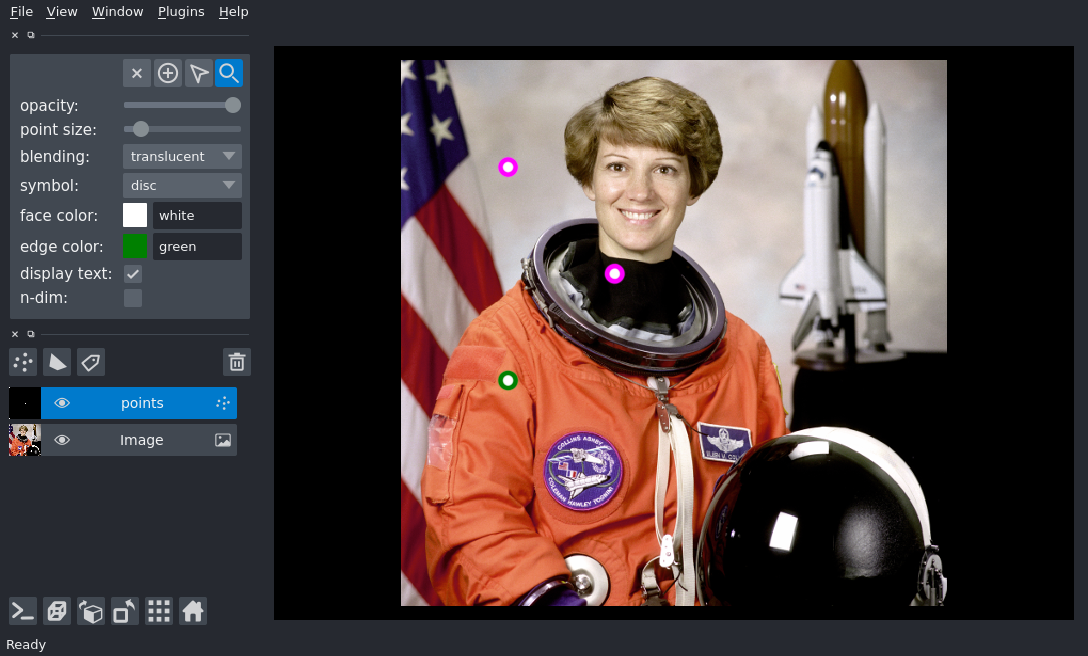

In [7]:
nbscreenshot(viewer)

In [8]:
viewer.close()

In the example above, the properties (`point_properties`) were provided as a
dictionary with two properties: `good_point` and `confidence`. The values of
each property are stored in a numpy ndarray with length 3 since there were three
coordinates provided in `points`. We set the edge color as a function of the
`good_point` property by providing the keyword argument
`edge_color='good_point'` to the `viewer.add_points()` method. We set the color
cycle via the `edge_color_cycle` keyword argument (`edge_color_cycle=['magenta',
'green']`). The color cycle can be provided as a list of colors (a list of
strings or a (M x 4) array of M RGBA colors).

### setting edge or face color with a colormap

Here we will set the face color of the markers with a color cycle on a property.
To do the same for a face color, substitute `edge_color` for `face_color` in the
example snippet below.

In [9]:
viewer = napari.view_image(data.astronaut(), rgb=True)
points = np.array([[100, 100], [200, 200], [300, 100]])
point_properties = {
    'good_point': np.array([True, True, False]),
    'confidence': np.array([0.99, 0.8, 0.2]),
}

points_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='confidence',
    face_colormap='viridis',
)

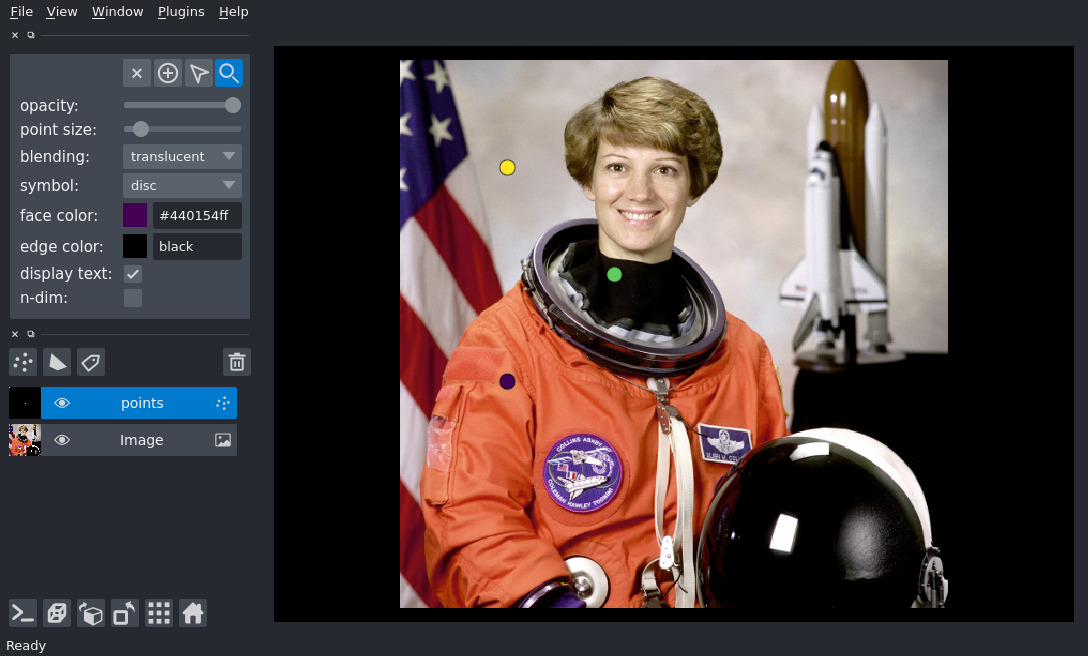

In [10]:
nbscreenshot(viewer)

In [11]:
viewer.close()

In the example above, the properties (`point_properties`) were provided as a
dictionary with two properties: `good_point` and `confidence`. The values of
each property are stored in a numpy ndarray with length 3 since there were three
coordinates provided in `points`. We set the face color as a function of the
`confidence` property by providing the keyword argument
`face_color='confidence'` to the `viewer.add_points()` method. We set the
colormap to viridis using the `face_colormap` keyword argument
(`face_colormap='viridis'`).

## changing the points symbol

The symbol for the points layer is a global property for the layer. All points
must have the same symbol. You can set the symbol on the loading of the layer
using the `symbol` keyword argument, or you can change it from the the GUI using
the symbol dropdown menu. Since the symbol property applies to all the points
you don't need to have any points selected for it to have an effect.

## copying and pasting points

It is possible to copy and paste any selected points using the `ctrl-C` and
`ctrl-V` keybindings, respectively. If you have a multidimensional `Points`
layer you can copy points from one slice to another by pasting them into the new
slice. The coordinates of the points in the visible dimensions will be in the
same place on the new slice as in the old slice, but the rest of the coordinates
will be updated with the new slice values.

## layer visibility

All our layers support a visibility toggle that allows you to set the `visible`
property of each layer. This property is located inside the layer widget in the
layers list and is represented by an eye icon.

## layer opacity

All our layers support an opacity slider and `opacity` property that allow you
to adjust the layer opacity between 0, fully invisible, and 1, fully visible.
The opacity value applies globally to all the points in the layer, and so you
don't need to have any points selected for it to have an effect.

## blending layers

All our layers support three blending modes `translucent`, `additive`, and
`opaque` that determine how the visuals for this layer get mixed with the
visuals from the other layers.

An `opaque` layer renders all the other layers below it invisible and will fade
to black as you decrease its opacity.

The `translucent` setting will cause the layer to blend with the layers below it
if you decrease its opacity but will fully block those layers if its opacity is
1. This is a reasonable default, useful for many applications.

The final blending mode `additive` will cause the layer to blend with the layers
below even when it has full opacity. This mode is especially useful for
visualizing multiple layers at the same time.

## naming layers

All our layers support a `name` property that can be set inside a text box
inside the layer widget in the layers list. The name of each layer is forced
into being unique so that you can use the name to index into `viewer.layers` to
retrieve the layer object.

## scaling layers

All our layers support a `scale` property and keyword argument that will rescale
the layer multiplicatively according to the scale values (one for each
dimension). This property can be particularly useful for viewing anisotropic
data where the size of the voxel in the z dimension might be different then the
size in the x and y dimensions.

## translating layers

All our layers support a `translate` property and keyword argument that you can
use to offset a layer relative to the other layers, which could be useful if you
are trying to overlay two layers for image registration purposes.

## layer metadata

All our layers also support a `metadata` property and keyword argument that you
can use to store an arbitrary metadata dictionary on the layer.

## putting it all together

Here you can see an example of adding, selecting, deleting points and change
their properties:

![image: editing points](../assets/tutorials/editing_points.gif)

## next steps

Hopefully, this tutorial has given you a detailed understanding of the `Points`
layer, including how to create one and control its properties. To learn more
about some of the other layer types that **napari** supports checkout some more
of our tutorials listed below. The [shapes layer](./shapes) tutorial is a great
one to try next as it describes more complex shapes and interactivity.